Тема урока: регулярные выражения
Регулярные выражения
Сырые строки и экранирование символов
Поиск заданного текста
Поиск любого символа
Поиск символа точки .
Поиск цифр
Поиск пробельных символов
Поиск алфавитно-цифровых символов
Аннотация. Урок посвящен изучению регулярных выражений.

Жизнь без регулярных выражений

Работая со строковыми объектами (тип str), программисты часто сталкиваются с задачей определения совпадения строк и/или проверки вхождения одной строки в другую.

В Python строки сравниваются посимвольно: две строки равны, если совпадают их длины и равны символы на каждой из позиций.

In [1]:
text1 = 'python!'
text2 = 'python' + '!'
text3 = 'Python!'

print(text1 == text2)
print(text1 == text3)

True
False


Для проверки принадлежности одной строки другой можно использовать несколько механизмов:

оператор принадлежности in
строковый метод index()
строковый метод find()

In [2]:
text = 'python 123 beegeek'

print('123' in text)
print(text.index('123'))
print(text.find('123'))

True
7
7


Строковый метод index() возбуждает исключение, если подстрока не найдена, в то время как метод find() возвращает значение −1.

Все три механизма (оператор in, метод index() и метод find()) выполняют поиск подстроки путем прямого посимвольного сравнения. Это позволит выполнить работу во многих случаях, но иногда проблема оказывается сложнее. Что если вместо фиксированной подстроки 123, мы хотим определить содержит ли строка text какие-либо три последовательных цифры, как в следующих строках:

python 123 beegeek
python 342 stepik
789 beegeek
number 557 is awesome!

В такой ситуации, очевидно приведенные выше механизмы без дополнительной логики не сработают.

Рассмотрим следующую задачу: пусть телефонный номер имеет шаблон ddd-ddd-dddd (три цифры дефис три цифры дефис четыре цифры). Требуется найти все телефонные номера в заданном тексте.

Приведенный ниже код решает задачу:

In [3]:
def is_phone_number(phone):
    groups = phone.split('-')
    if len(groups) != 3:
        return False
    if any((len(groups[0]) != 3, len(groups[1]) != 3, len(groups[2]) != 4)):
        return False
    chars = ''.join(groups)
    return all(c.isdigit() for c in chars)

def get_all_numbers(text):
    for c in range(len(text)):
        chunk = text[c:c + 12]
        if is_phone_number(chunk):
            yield chunk

txt = 'Привет всем, мой номер 919-654-8765, а еще у меня есть два дополнительных номера:543-780-0898 и 123-765-8907. Вот и все!'

print(list(get_all_numbers(txt)))

['919-654-8765', '543-780-0898', '123-765-8907']


Несмотря на то что код является рабочим и решает поставленную задачу, мы понимаем, что он не очень эффективный. Во-первых, с точки зрения расходуемой памяти, ведь нам приходится делать срезы по 12 символов. Если исходная строка будет очень большой, это может привести к проблемам нехватки памяти. Во-вторых, наш код жестко завязан на шаблон указанного телефонного номера. При малейшем изменении шаблона или его расширении (например, символ +7 в начале) вся логика кода ломается. Другими словами, наш код открыт для изменения, но закрыт для расширения.

Принцип открытости/закрытости — принцип ООП, устанавливающий следующее положение: программные сущности (классы, функции и т.д.) должны быть открыты для расширения, но закрыты для изменения.

Регулярные выражения

Регулярные выражения (regular expression, regex, регулярка) – это мощный способ обработки текста, позволяющий находить в строках подстроки по сложным условиям.

Чуть более формально, регулярное выражение — это строка, задающая шаблон поиска подстрок в тексте. Одному шаблону может соответствовать много разных строк. Регулярное выражение состоит из обычных символов и специальных командных последовательностей. Например, \d задаёт любую цифру, а \d+ — задает любую последовательность из одной или более цифр.

Работа с регулярными выражениями реализована во всех современных языках программирования. Однако существует несколько диалектов, поэтому функционал регулярных выражений может различаться от языка к языку.

В некоторых языках программирования пользоваться регулярными выражениями очень удобно (например, Python), в некоторых — не слишком (например, C++).

Регулярные выражения обычно применяют для:

поиска подстрок в строке
разделения строки на подстроки
замены части строки

Приведем несколько примеров регулярных выражений:

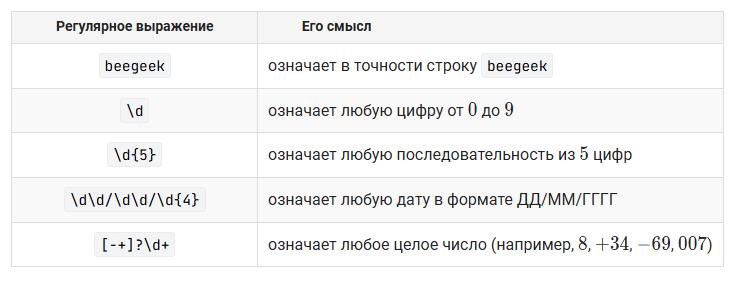

In [4]:
from functions import picture
picture('Без имцукенгени.png')

Регулярные выражения позволяют очень компактно описывать текстовые шаблоны.

Например, указанный выше шаблон телефонного номера ddd-ddd-dddd (три цифры дефис три цифры дефис четыре цифры) можно описать регулярным выражением:

\d\d\d-\d\d\d-\d\d\d\d

или еще более компактной версией:

\d{3}-\d{3}-\d{4}

Сырые строки и экранирование

В языке Python некоторые символы нужно экранировать, чтобы они воспринимались правильно. К таким символам относятся:

обратный слэш \
одинарная кавычка '
двойная кавычка "
и многие другие

In [5]:
print('\\')
print('\'')
print("\"")

\
'
"


Экранированные последовательности — это последовательности, которые начинаются с символа \, за которым следует один или более символов (\\, \', \", \n, \t и т.д.).

Чтобы написать правильно строку, в которой находятся два символа обратного слэша \\, оба символа надо экранировать, и в итоге получится строка вида \\\\. Вместо экранирования можно использовать сырые (raw) строки, и тогда каждый символ будет восприниматься так, как написан. Сырые строки отличаются от обычных тем, что при создании строки вначале пишется буква r.

In [6]:
print(r'\\привет мир')
print(r'\\\\')
print(r'\n')
print(r'\t')

\\привет мир
\\\\
\n
\t


Так как в регулярных выражениях часто используется символ обратного слэша \, то рекомендуется использовать сырые строки для описания регулярных выражений. Некоторые выражения правильно отработают и без них, но использование сырых строк для регулярных выражений это хороший тон.

Примечания

Примечание 3. Термин регулярные выражения является переводом английского словосочетания regular expressions. Перевод не очень точно отражает смысл, правильнее было бы шаблонные выражения.

Я в аду?
Напишите программу, которая в заданном тексте находит все телефонные номера, соответствующие следующим форматам:

7-ddd-ddd-dd-dd
8-ddd-dddd-dddd
где d — цифра от 0 до 9.

Формат входных данных
На вход программе подается строка произвольного содержания.

Формат выходных данных
Программа должна в введенном тексте найти все телефонные номера, соответствующие форматам, указанным в условии задачи, и вывести их в том порядке, в котором они были найдены, каждый на отдельной строке.

Примечание 1. Задачу можно решить как с помощью регулярных выражений, так и без них. На данном этапе еще не был изучен модуль для решения с помощью регулярных выражений, поэтому рекомендованным способом является решение без них. При желании можно вернуться к задаче после изучения соответствующего модуля.

Примечание 2. Тестовые данные доступны по ссылкам:

In [63]:
from sys import stdin
import re
from  itertools import groupby, chain

s = stdin.readline()
# s = 'Перезвони мне, пожалуйста: 7-919-667-21-19'
# s = 'Артур: +7-919-667-21-19, Анри: 7-hey-anri-anri, Тимур: 8-917-4864-1911'
s = 'Тимур: 7-ddd-ddd-dd-dd, Сослан: 8-ddd-dddd-dddd, Артур: 7-123-123-11-22,,,, Дима: 8-123-123-11-22, Анри: 8-123-1231-1221...... Гвидо: 7-123-1231-1221, 7-123-13-181-22, 8-1237-131-1221'

l = list()
result1 = re.findall(r'7-\d{3}-\d{3}-\d{2}-\d{2}', s)
l.append(result1)
# print(*result1)
result2 = re.findall(r'8-\d{3}-\d{4}-\d{4}', s)
l.append(result2)
# print(*result2)
# print(*l)
unique = [key for key, _ in groupby(sorted(chain(*l)))]
print(*unique, sep='\n')

7-123-123-11-22
8-123-1231-1221


Поиск заданного текста

Для создания регулярных выражений необходимо использовать специальный синтаксис. Любая строка текста сама по себе является регулярным выражением. Например, Timur – это регулярное выражение. Поскольку это просто текст, он ничем не напоминает регулярное выражение, однако он им таки является. Регулярные выражения могут содержать простой текст и могут даже состоять из простого текста.

Регулярному выражению:

Timur

в тексте:

Hello, my name is Timur. Please visit my website at https://stepik.org/org/pygen.

соответствует (выделено жирным шрифтом):

Hello, my name is Timur. Please visit my website at https://stepik.org/org/pygen.

Используемое здесь регулярное выражение – буквальный текст, и оно находит вхождение Timur в исходном тексте.

Регулярному выражению:

is

в тексте:

Hello, my name is Timur. Please visit my website at https://stepik.org/org/pygen.

соответствует (выделено жирным шрифтом):

Hello, my name is Timur. Please visit my website at https://stepik.org/org/pygen.

Обратите внимание на то, что было найдено два вхождения is.

Регулярные выражения сами по себе всегда ищут все вхождения. Модуль re, который будет изучен нами чуть позже, включает разные функции, и те, которые ищут только первое вхождение, и те которые возвращают список всех вхождений, соответствующих регулярному выражению.

Регулярные выражения являются регистрозависимыми, то есть регулярному выражению Timur не будет соответствовать строка timur.

Поиск любого символа

С помощью регулярных выражений можно искать не только известный заранее (статический) текст, но и текст в котором есть неизвестные символы. Чтобы найти соответствие некоторому шаблону, в регулярных выражениях используются специальные символы (или наборы символов), которые называются метасимволами. Символ точка . соответствует одному любому символу.

Регулярному выражению:

sales.

в тексте:

sales1.csv
orders3.csv
sales2.csv
sales3.csv
apac1.csv
europe2.csv
na1.csv
na2.csv
sa1.csv

соответствует (выделено жирным шрифтом):

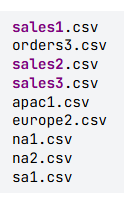

In [64]:
picture('Без иромени.png')

Регулярное выражение sales. позволяет найти все имена файлов, содержащие подстроку sales, за которой следует еще один произвольный символ. Ровно три файла из девяти соответствуют такому шаблону.

Обратите внимание на то, что регулярные выражения сопоставляют шаблоны строкам. Эти шаблоны не всегда будут совпадать со всей строкой, а только с теми символами, которые соответствуют шаблону, даже если они являются только частью строки.

Таким образом, специальный символ . соответствует любому символу – символу алфавита, цифре и даже самому символу точки ..

Регулярному выражению:

sales.

в тексте:

sales.csv
sales1.csv
orders3.csv
sales2.csv
sales3.csv
apac1.csv
europe2.csv
na1.csv
na2.csv
sa1.csv

соответствует (выделено жирным шрифтом):

sales.csv

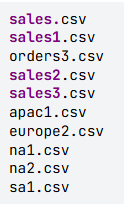

In [65]:
picture('Без иghjhjiyuмени.png')

Этот пример содержит один дополнительный файл sales.csv. Файл был найден с помощью регулярного выражения sales., поскольку специальный символ . находит любой символ.

В регулярном выражении можно использовать несколько символов ., либо вместе (регулярное выражение .. будет соответствовать любым двум символам друг рядом с другом), либо в различных местах.

Регулярному выражению:

.a.

в тексте:

sales1.csv
orders3.csv
sales2.csv
sales3.csv
apac1.csv
europe2.csv
na1.csv
na2.csv
sa1.csv

соответствует (выделено жирным шрифтом):

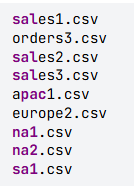

In [66]:
picture('Без имеerни.png')

Если мы хотим найти все файлы только для Северной Америки (na) и Южной Америки (sa) независимо от того, какая цифра следует после этих сокращений, то нам нужно немного изменить регулярное выражение. Необходимо регулярное выражение .a. за которым следует точка.

Регулярному выражению:

.a..

в тексте:

sales1.csv
orders3.csv
sales2.csv
sales3.csv
apac1.csv
europe2.csv
na1.csv
na2.csv
sa1.csv

соответствует (выделено жирным шрифтом):

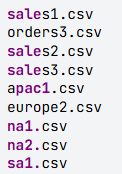

In [67]:
picture('Без иqwмени.png')

Несложно заметить, что регулярное выражение .a.. работает нисколько не лучше, чем .a., поскольку добавленная точка соответствует любому символу.

Поиск символа точки

Точка . имеет специальное значение в регулярных выражениях. Если в регулярном выражении нужен сам символ точки ., то ее необходимо экранировать. Для этого необходимо предварить точку символом обратного слэша \.

В регулярных выражениях точка . соответствует любому символу, а обратный слэш с точкой \. соответствует только самому символу точки ..

Регулярному выражению:

.a.\.csv

в тексте:

sales1.csv
orders3.csv
sales2.csv
sales3.csv
apac1.csv
europe2.csv
na1.csv
na2.csv
sa1.csv

соответствует (выделено жирным шрифтом):

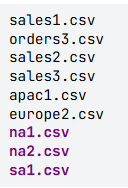

In [68]:
picture('Без имghени.png')

Первый символ . в регулярном выражении .a.\.csv соответствует символу n (в первых двух вхождениях) или символу s (в третьем вхождении). Второй символ . соответствует символу 1 (в первом и третьем вхождениях) или символу 2 (во втором вхождении). Последовательность символов \. соответствует точке ., отделяющей имя файла от расширения, а последовательность символов csv соответствует самой себе.

Если в регулярном выражении нужен символ \, то его также нужно экранировать \\.

Поиск цифр

Как уже было сказано, метасимволы – это символы, которые имеют специальное значение в регулярных выражениях.

Для поиска любой цифры от 0 до 9 используется метасимвол \d.

Регулярному выражению:

..\d

в тексте:

sales.csv
sales1.csv
orders3.csv
sales2.csv
sales3.csv
apac1.csv
europe2.csv
na1.csv
na2.csv
sa1.csv

соответствует (выделено жирным шрифтом):

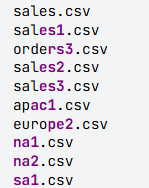

In [69]:
picture('Без именasи.png')

Для поиска любого нецифрового символа используется метасимвол \D.

Регулярному выражению:

e\D

в тексте:

sales.csv
sales1.csv
orders3.csv
sales2.csv
sales3.csv
apac1.csv
europe2.csv
na1.csv
na2.csv
sa1.csv

соответствует (выделено жирным шрифтом):

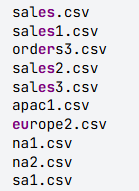

In [70]:
picture('Без имjhgfени.png')

Поиск пробельных символов

Для поиска пробельного символа (пробел, табуляция, конец строки) используется метасимвол \s.

Регулярному выражению:

.\s.

в тексте:

привет, наконец начали изучать регулярные выражения.

соответствует (выделено жирным шрифтом):

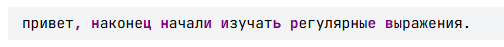

In [71]:
picture('Без имеlkjи.png')

Для поиска любого непробельного символа используется метасимвол \S.

Регулярному выражению:

к\S\S

в тексте:

Математик, учитель, написание нового курса скорррро.

соответствует (выделено жирным шрифтом):

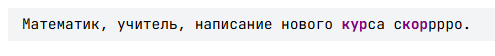

In [72]:
picture('Без edeимени.png')

Поиск алфавитно-цифровых символов

Есть еще один часто используемый набор – буквы (в верхнем и нижнем регистре), цифры и символ подчеркивания.

Для поиска таких символов используется метасимвол \w.

Регулярному выражению:

\w\w\w\w

в тексте:

_xy_
1234
geek
-xy-
Code
a1b2

соответствует (выделено жирным шрифтом):

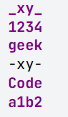

In [73]:
picture('Без и1мени.png')

Для поиска символов, не являющихся буквой, цифрой и подчёркиванием используется метасимвол \W

Регулярному выражению:

\w\W\W\w

в тексте:

x!?y
a..b
geek
1+-2
1234
x__y

соответствует (выделено жирным шрифтом):

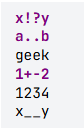

In [74]:
picture('Без имен7и.png')

Примечания

Примечание 1. Так же, как и в Python, в регулярных выражениях выражение \n соответствует концу строки, а \t — табуляции.

Примечание 3. Как правило, в регулярных выражениях точке . соответствует любой символ. Однако в большинстве реализаций регулярных выражений точке . соответствует любой символ, кроме символа новой строки (\n).

Примечание 4. Сайт https://regex101.com/ для отладки регулярных выражений доступен по ссылке (не забудьте поставить галочку Python в разделе FLAVOR слева).

In [75]:
import re
re.findall('a...s', "Let's write a couple of words with the letter a: alias, apple, abyss, angle")

['alias', 'abyss']

Задачи на регулярное выражение

Перед тем как вы приступите к представленным упражнениям, мы бы хотели немного рассказать о задачах, в которых требуется написать регулярное выражение. Рассмотрим пару таких задач и дадим несколько комментариев относительно их оформления.

Задача 1. Дополните приведенный ниже код, чтобы переменная regex содержала регулярное выражение, которому соответствует строка Hello.

In [ ]:
regex = r''

Решение. В задаче требуется реализовать регулярное выражение и присвоить его переменной regex. Регулярное выражение, которому соответствует строка Hello представляет собой саму строку Hello. 

Итак, наше регулярное выражение имеет вид:

In [ ]:
regex = r'Hello'

Приведенный выше код является ответом на задачу, и именно его следует вставить в окошко ввода. Дополнительно считывать\выводить данные не нужно, требуется лишь реализовать регулярное выражение и присвоить его указанной переменной.

Задача 2. Дополните приведенный ниже код, чтобы переменная regex содержала регулярное выражение, которому соответствуют трехсимвольные цифровые последовательности.

In [ ]:
regex = r''

Решение. В задаче требуется реализовать регулярное выражение и присвоить его переменной regex. Для решения воспользуемся метасимволом \d, соответствующим любой цифре.

In [ ]:
regex = r'\d\d\d'

Дополните приведенный ниже код, чтобы переменная regex содержала регулярное выражение, которому соответствует строка beegeek.

In [ ]:
regex = r'beegeek'

Дополните приведенный ниже код, чтобы переменная regex содержала регулярное выражение, которому соответствуют последовательности формата xxx.xxx, где x — любой символ.

In [ ]:
regex = r'...\....'

Дополните приведенный ниже код, чтобы переменная regex содержала регулярное выражение, которому соответствуют последовательности цифр, представляющие целые числа от 100 до 199 включительно.

In [ ]:
regex = r'1\d\d'

Дополните приведенный ниже код, чтобы переменная regex содержала регулярное выражение, которому соответствуют телефонные номера формата xxx-xxx-xxxx, где x — произвольная цифра.

In [ ]:
regex = r'\d{3}-\d{3}-\d{4}'